/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


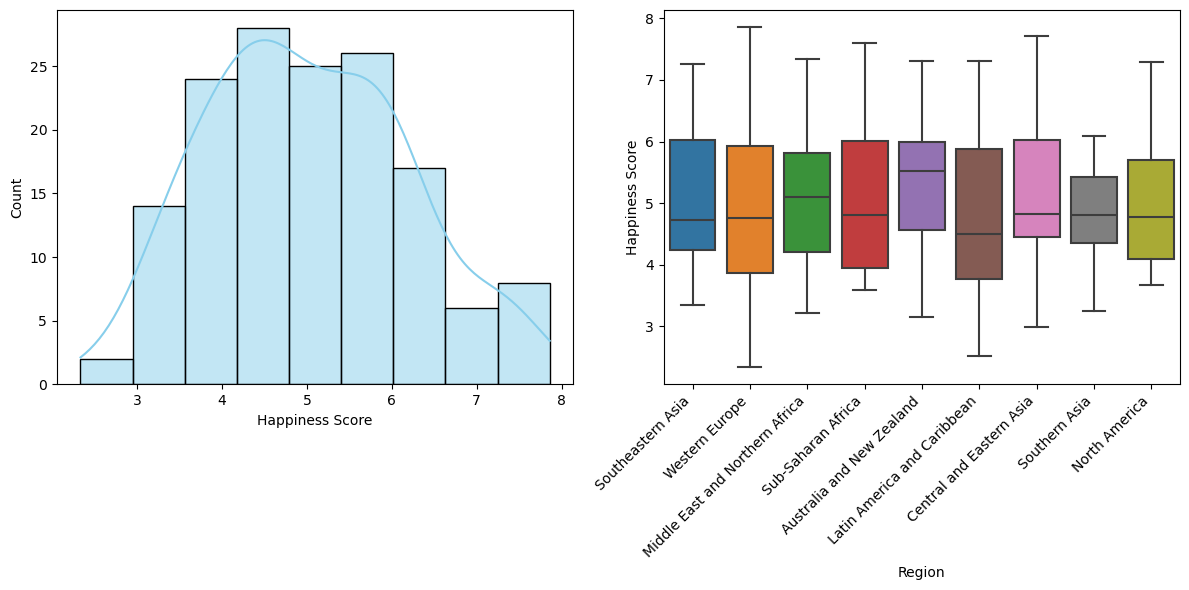

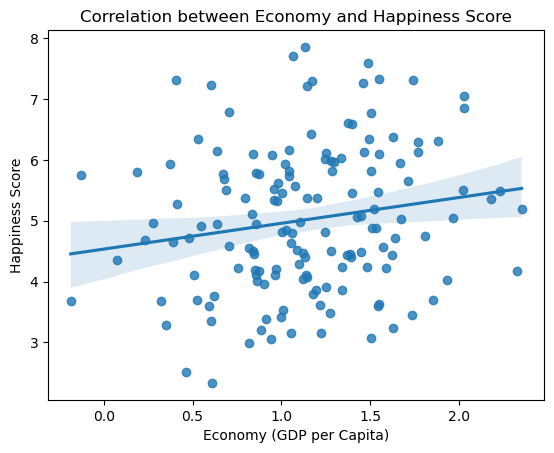

Number of data points: (150, 4)
Mean Happiness Score: 5.015714983300106
Median Happiness Score: 4.933700745808835
Std Happiness Score: 1.1852715320552052
Min Happiness Score: 2.331916217330688
Max Happiness Score: 7.85977372983673
Pearson correlation (GDP vs Happiness): 0.1730546034146241
p-value: 0.034196056366872875
                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.569
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0342
Time:                        13:20:52   Log-Likelihood:                -236.06
No. Observations:                 150   AIC:                             476.1
Df Residuals:                     148   BIC:                             482.1
Df Model:                           1           

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Create a sample dataset
np.random.seed(0)
regions = [
    'Western Europe', 'North America', 'Australia and New Zealand',
    'Middle East and Northern Africa', 'Latin America and Caribbean',
    'Southeastern Asia', 'Central and Eastern Asia',
    'Sub-Saharan Africa', 'Southern Asia'
]
countries = 150

sample_data = {
    'Country': [f'Country_{i}' for i in range(countries)],
    'Region': np.random.choice(regions, countries),
    'Happiness Score': np.random.normal(5, 1.2, countries),
    'Economy (GDP per Capita)': np.random.normal(1.2, 0.5, countries)
}
df_clean = pd.DataFrame(sample_data)

# Data cleaning: Remove null values (none in this generated data)
# Check data size after cleaning
num_data_points = df_clean.shape

# Five NumPy operations
mean_happiness = np.mean(df_clean['Happiness Score'])
median_happiness = np.median(df_clean['Happiness Score'])
std_happiness = np.std(df_clean['Happiness Score'])
min_happiness = np.min(df_clean['Happiness Score'])
max_happiness = np.max(df_clean['Happiness Score'])

# One SciPy operation: Pearson correlation between GDP per capita and Happiness Score
pearson_corr, p_value = stats.pearsonr(df_clean['Economy (GDP per Capita)'], df_clean['Happiness Score'])

# One Statsmodels operation: Regression predicting Happiness Score from Economy (GDP per Capita)
X = df_clean['Economy (GDP per Capita)']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(df_clean['Happiness Score'], X).fit()

# Visualizations
# Histogram with KDE of Happiness Score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['Happiness Score'], kde=True, color='skyblue')
plt.xlabel('Happiness Score')
plt.ylabel('Count')

# Boxplot of Happiness Score by Region
plt.subplot(1, 2, 2)
sns.boxplot(x='Region', y='Happiness Score', data=df_clean)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

# Correlation plot with regression line
sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df_clean)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Correlation between Economy and Happiness Score')
plt.show()

# Output key results
print("Number of data points:", num_data_points)
print("Mean Happiness Score:", mean_happiness)
print("Median Happiness Score:", median_happiness)
print("Std Happiness Score:", std_happiness)
print("Min Happiness Score:", min_happiness)
print("Max Happiness Score:", max_happiness)
print("Pearson correlation (GDP vs Happiness):", pearson_corr)
print("p-value:", p_value)
print(model.summary())